In [1]:
import numpy as np
import pandas as pd

# Define weather conditions and locations
weather_conditions = ['Clear', 'Extreme Heat', 'Partly Cloudy', 'Rain', 'Storm', 'Sunny']
locations = ['Arena', 'Convention Center', 'Park', 'Stadium', 'Theater']

# Generate synthetic data
np.random.seed(42)  # for reproducibility

# Number of data points
num_data_points = 1000

# Generate random data for each column
weather_forecast = np.random.choice(weather_conditions, num_data_points)
location = np.random.choice(locations, num_data_points)
email = np.random.randint(0, 1000, num_data_points)
social_media = np.random.randint(0, 1000, num_data_points)
flyers_distributed = np.random.randint(0, 1000, num_data_points)
others = np.random.randint(0, 1000, num_data_points)
ratings = np.random.randint(1, 11, num_data_points)  # Ratings from 1 to 10

# Calculate attendance based on conditions
attendance = []

for i in range(num_data_points):
    # Assign weights based on weather and location
    if weather_forecast[i] in ['Clear', 'Sunny', 'Partly Cloudy'] and location[i] in ['Park', 'Arena', 'Stadium']:
        weather_weight = 1.5
        location_weight = 1.3
    elif weather_forecast[i] in ['Extreme Heat', 'Storm', 'Rain'] or location[i] in ['Convention Center', 'Theater']:
        weather_weight = 0.1
        location_weight = 0.4
    else:
        weather_weight = 1
        location_weight = 1

    # Calculate attendance based on weights and advertisement modes
    total_advertisement = email[i] + social_media[i] + flyers_distributed[i] + others[i]
    base_attendance = 1000 + 3 * total_advertisement * weather_weight * location_weight
    adjusted_attendance = base_attendance * (0.8 + 0.2 * ratings[i])  # Adjusting attendance based on rating

    # Append adjusted attendance to list
    attendance.append(int(adjusted_attendance))  # Convert to integer

# Create DataFrame
data = pd.DataFrame({
    'weather_forecast': weather_forecast,
    'location': location,
    'email': email,
    'social_media': social_media,
    'flyers_distributed': flyers_distributed,
    'others': others,
    'rating': ratings,  # Add rating to DataFrame
    'attendance': attendance
})

# Save dataset to CSV
data.to_csv('exhibition_attendance_dataset.csv', index=False)


In [2]:
data.head(20)

,weather_forecast,location,email,social_media,flyers_distributed,others,rating,attendance
0,Rain,Theater,303,848,586,513,5,2286
1,Storm,Stadium,68,876,416,375,4,1933
2,Partly Cloudy,Park,360,562,957,21,7,26653
3,Storm,Arena,601,756,215,882,5,2330
4,Storm,Park,957,914,406,312,7,2883
5,Extreme Heat,Park,219,425,398,996,1,1244
6,Partly Cloudy,Theater,961,546,922,839,1,1392
7,Partly Cloudy,Stadium,703,301,714,518,10,39425
8,Partly Cloudy,Convention Center,965,921,703,205,3,1869
9,Storm,Stadium,574,580,760,951,2,1612


In [1]:
import matplotlib.pyplot as plt

# Aggregate attendance values for each weather condition
attendance_by_weather = data.groupby('weather_forecast')['attendance'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(6, 6))
plt.plot(attendance_by_weather['weather_forecast'], attendance_by_weather['attendance'], marker='o', linestyle='-')
plt.title('Average Attendance by Weather')
plt.xlabel('Weather')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'data' is not defined

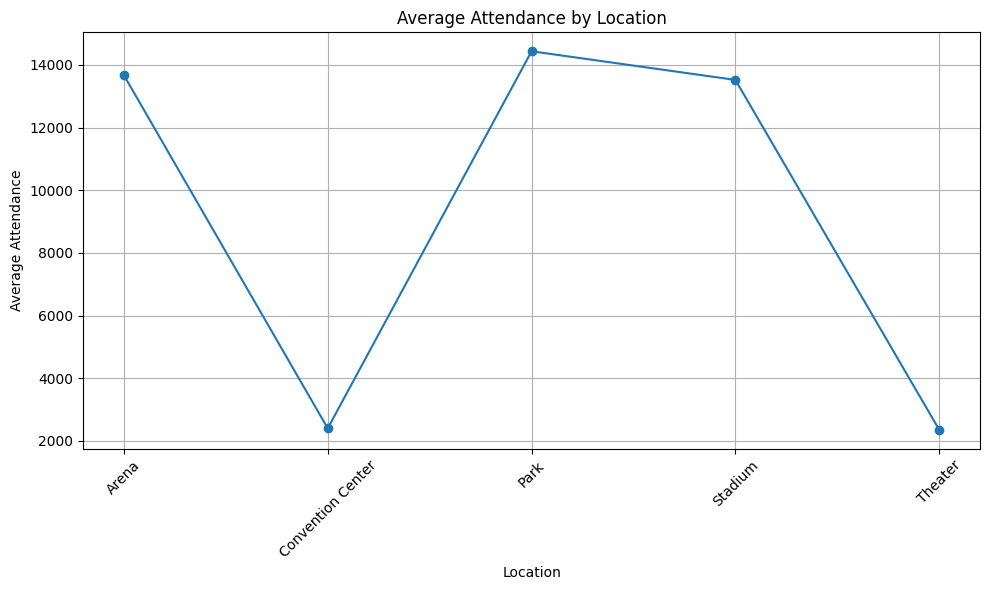

In [4]:
import matplotlib.pyplot as plt

# Aggregate attendance values for each location
attendance_by_location = data.groupby('location')['attendance'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(attendance_by_location['location'], attendance_by_location['attendance'], marker='o', linestyle='-')
plt.title('Average Attendance by Location')
plt.xlabel('Location')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()


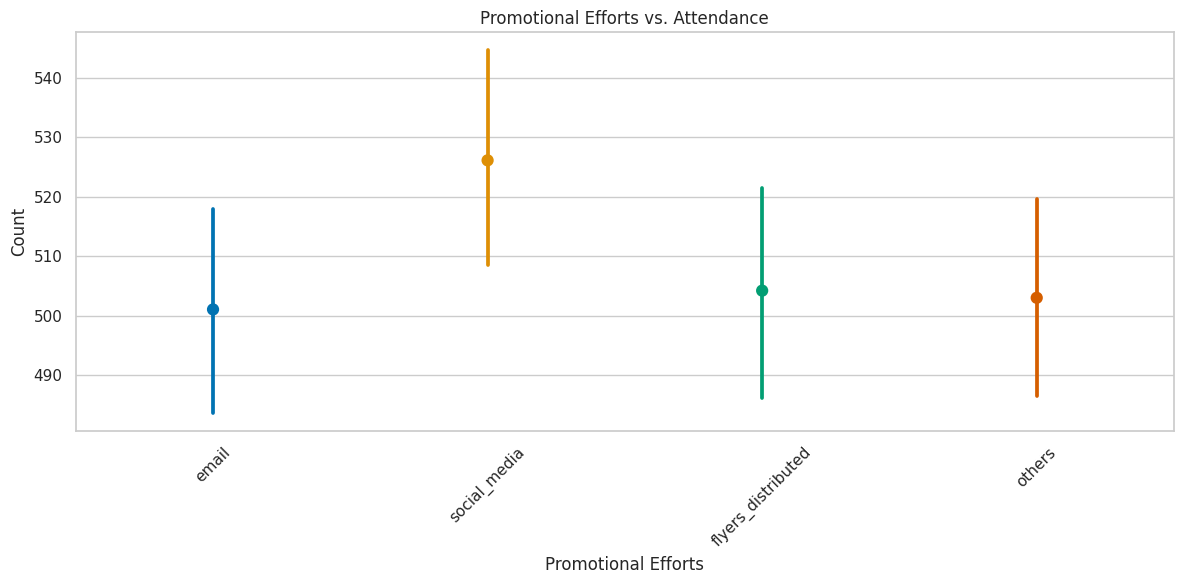

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Define the columns to plot
promotional_columns = ['email', 'social_media', 'flyers_distributed', 'others']

# Melt the dataframe to have a tidy format
melted_data = data.melt(value_vars=promotional_columns, var_name='Promotional Efforts', value_name='Count')

# Create a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='Promotional Efforts', y='Count', data=melted_data, dodge=True, markers=["o", "s", "D", "^"], linestyles=["-", "--", "-.", ":"], palette='colorblind')

# Add labels and title
plt.title('Promotional Efforts vs. Attendance')
plt.xlabel('Promotional Efforts')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
df = pd.read_csv('/kaggle/input/exhibition-attendance-data/exhibition_attendance_dataset.csv')

# Preprocessing
X = df.drop('attendance', axis=1)
y = df['attendance']

# Define categorical features for encoding
categorical_features = ['weather_forecast', 'location']
one_hot_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline setup
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', DecisionTreeRegressor())])

# Parameters grid setup
param_grid = [
    {
        'model': [DecisionTreeRegressor(random_state=42)],
        'model__max_depth': [10, 20],
        'model__min_samples_leaf': [1, 2],
        'model__min_samples_split': [2, 5]
    },
    {
        'model': [RandomForestRegressor(random_state=42)],
        'model__n_estimators': [10, 30],
        'model__max_depth': [ 10, 20],
        'model__min_samples_leaf': [1, 2 ],
    }
]

# Grid Search setup
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit grid search
grid_search.fit(X, y)

# Best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best Model Parameters: {best_params}")
print(f"Best Model Score (MSE): {best_score}")

# Predict with the best model on test data
# For example purposes, let's predict using the entire dataset
y_pred = best_model.predict(X)

# Evaluate predictions (optional, as best model was already evaluated during CV)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'Evaluation on the entire dataset:')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np

# # Predict on the test set
# y_pred = pipeline.predict(X_test)

# # Calculate MAE
# mae = mean_absolute_error(y_test, y_pred)
# print(f'Mean Absolute Error: {mae}')

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f'Root Mean Squared Error: {rmse}')

# # Calculate MAPE
# mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# print(f'Mean Absolute Percentage Error: {mape}%')

In [ ]:
def predict_attendance(best_model):
    # Take user inputs
    print("Please enter the details for the attendance prediction:")
    weather = input("Weather Forecast (e.g., Clear, Extreme Heat, Partly Cloudy, Rain, Storm, Sunny): ")
    loc = input("Location (e.g., Arena, Convention Center, Park, Stadium, Theater): ")
    email = int(input("Number of emails sent: "))
    social_media = int(input("Social media marketing efforts: "))
    flyers = int(input("Number of flyers distributed: "))
    others = int(input("Other advertising efforts: "))
    rating = int(input("PLease rate this event(scale 0-10): "))


    # Create a DataFrame from the input
    input_data = pd.DataFrame({
        'weather_forecast': [weather],
        'location': [loc],
        'email': [email],
        'social_media': [social_media],
        'flyers_distributed': [flyers],
        'others': [others],
        'rating':[rating]
    })

    # Use the fitted best_model to predict the new instance
    predicted_attendance = best_model.predict(input_data)
    print(f"Predicted Attendance: {predicted_attendance[0]:.0f}")

# Call the function to test with custom inputs, passing the best_model
predict_attendance(best_model)


# Iterative model training with real data

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

def load_and_update_data(main_data_path, new_data_path):
    try:
        # Load the existing dataset
        data = pd.read_csv(main_data_path)
        # Load new data
        new_data = pd.read_csv(new_data_path)
        
        # Check if new data has at least 10 entries
        if len(new_data) >= 10:
            # Append new data to the existing dataset
            updated_data = pd.concat([data, new_data], ignore_index=True)
            # Check if the length of the updated dataset is greater than 10
            if len(updated_data) > 10:
                # Save the updated dataset in CSV format
                updated_data.to_csv('/kaggle/working/updated_dataset.csv', index=False)
                print("Data updated with new entries and saved to /kaggle/working.")
                return updated_data
            else:
                print("Not enough new data to update. Waiting for more entries.")
                return data
        else:
            print("Not enough new data to update. Waiting for more entries.")
            return data
    except Exception as e:
        print(f"Failed to load or update data: {e}")
        return None
    
def retrain_model(data):
    try:
        # Preprocessing setup
        X = data.drop('attendance', axis=1)
        y = data['attendance']
        categorical_features = ['weather_forecast', 'location']
        one_hot_encoder = OneHotEncoder()
        preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, categorical_features)],
                                         remainder='passthrough')
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeRegressor())])
        
        # Define parameter grid
        param_grid = [
            {'model': [DecisionTreeRegressor(random_state=42)], 'model__max_depth': [10, 20], 'model__min_samples_leaf': [1, 2], 'model__min_samples_split': [2, 5]},
            {'model': [RandomForestRegressor(random_state=42)], 'model__n_estimators': [10, 30], 'model__max_depth': [10, 20], 'model__min_samples_leaf': [1, 2]},
        ]

        # Grid Search setup
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, error_score='raise')
        grid_search.fit(X, y)
    
        # Best model selection
        best_model = grid_search.best_estimator_
        print(f"Model retrained. Best score: {-grid_search.best_score_}")
        return best_model
    except Exception as e:
        print(f"Failed to retrain model: {e}")
        return None

def predict_attendance(best_model):
    if best_model is None:
        print("No valid model is available for predictions.")
        return
    
    print("Please enter the details for the attendance prediction:")
    weather = input("Weather Forecast (e.g., Clear, Extreme Heat, Partly Cloudy, Rain, Storm, Sunny): ")
    loc = input("Location (e.g., Arena, Convention Center, Park, Stadium, Theater): ")
    email = int(input("Number of emails sent: "))
    social_media = int(input("Social media marketing efforts: "))
    flyers = int(input("Number of flyers distributed: "))
    others = int(input("Other advertising efforts: "))
    rating = int(input("PLease rate this event(scale 0-10): "))
    
    try:
        input_data = pd.DataFrame({
            'weather_forecast': [weather],
            'location': [loc],
            'email': [email],
            'social_media': [social_media],
            'flyers_distributed': [flyers],
            'others': [others],
            'rating':[rating]
        })
        
        predicted_attendance = best_model.predict(input_data)
        print(f"Predicted Attendance: {predicted_attendance[0]:.0f}")
    except Exception as e:
        print(f"Failed to make prediction: {e}")

if __name__ == "__main__":
    try:
        data_path = '/kaggle/input/exhibition-attendance-data/exhibition_attendance_dataset.csv'
        new_data_path = '/kaggle/input/new-dataset/Book2.csv'
        updated_data = load_and_update_data(data_path, new_data_path)
        if updated_data is not None:
            best_model = retrain_model(updated_data)
            predict_attendance(best_model)
    except Exception as e:
        print(f"An error occurred during processing: {e}")


Data updated with new entries and saved to /kaggle/working.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Model retrained. Best score: 6061768.497800267
Please enter the details for the attendance prediction:


Weather Forecast (e.g., Clear, Extreme Heat, Partly Cloudy, Rain, Storm, Sunny):  Rain
Location (e.g., Arena, Convention Center, Park, Stadium, Theater):  Park
Number of emails sent:  878
Social media marketing efforts:  687
Number of flyers distributed:  987
Other advertising efforts:  984
PLease rate this event(scale 0-10):  6


Predicted Attendance: 2702
